In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
file_path = "/Users/liusenyuan/Desktop/方正/project3/commodity_data_full.xlsx"
df = pd.read_excel(file_path)
df

,Wind资讯,AFI.WI,AGFI.WI,ALFI.WI,AUFI.WI,BUFI.WI,CFFI.WI,CFI.WI,CSFI.WI,CUFI.WI,...,RBFI.WI,RMFI.WI,RUFI.WI,SNFI.WI,SRFI.WI,TAFI.WI,TCFI.WI,VFI.WI,YFI.WI,ZNFI.WI
0,NaN,连豆指数,沪银指数,沪铝指数,沪金指数,沥青指数,郑棉指数,玉米指数,淀粉指数,沪铜指数,...,螺纹指数,菜粕指数,沪胶指数,沪锡指数,郑糖指数,TA指数,动煤指数,PVC指数,豆油指数,沪锌指数
1,日期,收盘价,收盘价,收盘价,收盘价,收盘价,收盘价,收盘价,收盘价,收盘价,...,收盘价,收盘价,收盘价,收盘价,收盘价,收盘价,收盘价,收盘价,收盘价,收盘价
2,2010-04-16 00:00:00,3925.29,0,16970.0386,254.0401,0,16751.0587,1913.5313,0,62286.3911,...,4821.8466,0,25345.6597,0,5222.7475,8563.8552,0,7965.4153,7768.9382,19606.3174
3,2010-04-19 00:00:00,3895.8652,0,16528.7231,249.5109,0,16597.982,1923.9021,0,60057.4403,...,4738.1086,0,24368.1988,0,5107.0537,8413.7765,0,7899.9181,7653.8023,18699.088
4,2010-04-20 00:00:00,3932.3236,0,16645.8225,250.9579,0,16736.331,1923.0659,0,60820.2225,...,4758.275,0,24774.5519,0,5165.6774,8483.3942,0,7934.6635,7691.5781,18976.9691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,2016-06-03 00:00:00,3826.6934,3583.5773,11952.5888,258.6281,1879.1983,12440.2703,1636.1914,2191.6464,35723.5274,...,1985.1202,2554.7546,10847.154,107592.0488,5757.7024,4676.5898,416.4812,5116.5672,6152.925,15580.043
1493,2016-06-06 00:00:00,3828.1556,3649.3669,11813.4255,264.3639,1918.3236,12636.4358,1648.8668,2220.5999,36264.0499,...,2053.5892,2567.6938,11031.0987,109342.4644,5825.1171,4694.276,411.3968,5111.8249,6212.7591,15735.7172
1494,2016-06-07 00:00:00,3831.9085,3658.5569,11706.2554,264.8136,1927.5793,12946.9369,1648.1444,2198.4204,35859.6248,...,2070.2875,2582.0608,10879.4791,109553.2161,5764.0522,4677.3738,414.8311,5115.9114,6273.7709,15741.1069
1495,2016-06-08 00:00:00,3825.2234,3695.6518,11890.5122,266.5279,1918.3028,12854.4964,1636.9666,2190.703,35273.9704,...,2089.2598,2591.4086,10764.9517,109321.0679,5770.5832,4697.0324,413.8916,5058.4403,6208.3982,15608.4928


In [4]:
data = df.drop(index=[0,1]).rename(columns={'Wind资讯':'Date'})

In [5]:
data = data.reset_index()

In [40]:
def absolute_value(x,y, df):
    MA_x = []
    for i in range(len(df['Date'])):
        if i<x-1:
            MA_x.append(0)
        else:
            add_value = sum(df['Price'][i-(x-1):i+1])/x
            MA_x.append(add_value)     
    MA_y = []
    for i in range(len(df['Date'])):
        if i<y-1:
            MA_y.append(0)
        else:
            add_value = sum(df['Price'][i-(y-1):i+1])/y
            MA_y.append(add_value)
    position = False#持仓
    golden_cross = False
    death_cross = False
    golden_cross_price = 0
    death_cross_price = 100000000
    absolute = [1]
    near_gold = False
    near_death = False
    trade = 0
    
    for i in range(1,len(df['Date'])):
        #判断金叉:
        if (MA_x[i-1]<MA_y[i-1]) and (MA_x[i]>MA_y[i]):
            golden_cross = True
            golden_cross_price = df['Price'][i]
            near_gold = True
        #判断死叉:
        elif (MA_x[i-1]>MA_y[i-1]) and (MA_x[i]<MA_y[i]):
            death_cross = True
            golden_cross = False
            near_death = True
            death_cross_price = df["Price"][i]
        else:
            golden_cross = False
            death_cross = False

        if position==False:#空仓情况下
            if golden_cross == True:
                absolute.append(absolute[i-1])
                position = 1 # 开多单
                trade+=1
            elif df["Price"][i] > golden_cross_price and near_gold:
                absolute.append(absolute[i-1])
                position = 1 # 开多单
                trade+=1
                near_gold = False
            elif death_cross == True:#死叉
                absolute.append(absolute[i-1])
                position = 2 # 开空单
                short_price = death_cross_price
                short_position = absolute[-1]
                trade+=1
            elif df['Price'][i] < death_cross_price and near_death:
                absolute.append(absolute[i-1])
                position = 2 # 开空单
                short_price = death_cross_price
                short_position = absolute[-1]
                trade+=1  
                near_death = False
            else:
                absolute.append(absolute[i-1])
                position = False
        else:#持仓情况下
            if position == 1:
                absolute.append(absolute[-1]*(df['Price'][i]/df['Price'][i-1]))
                if df['Price'][i] >= golden_cross_price:
                    position = False
            else:
                absolute.append(short_position*short_price/df["Price"][i])
                if df['Price'][i] <= death_cross_price:
                    position = False
 
    return absolute

In [41]:
result = {}
for kind in (set(data.columns)-set(["Date"])):
    df = data[['Date', kind]].rename(columns={kind: 'Price'})
    result[kind] = absolute_value(9,77, df)

    

In [42]:
result2 = pd.DataFrame(result).mean(axis=1)

In [44]:
result2.index = data["Date"]

<AxesSubplot:xlabel='Date'>

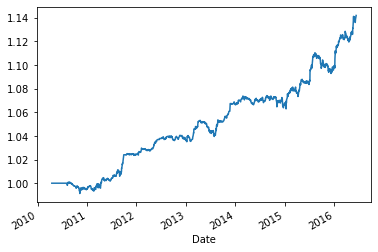

In [31]:
result2.plot()

<AxesSubplot:xlabel='Date'>

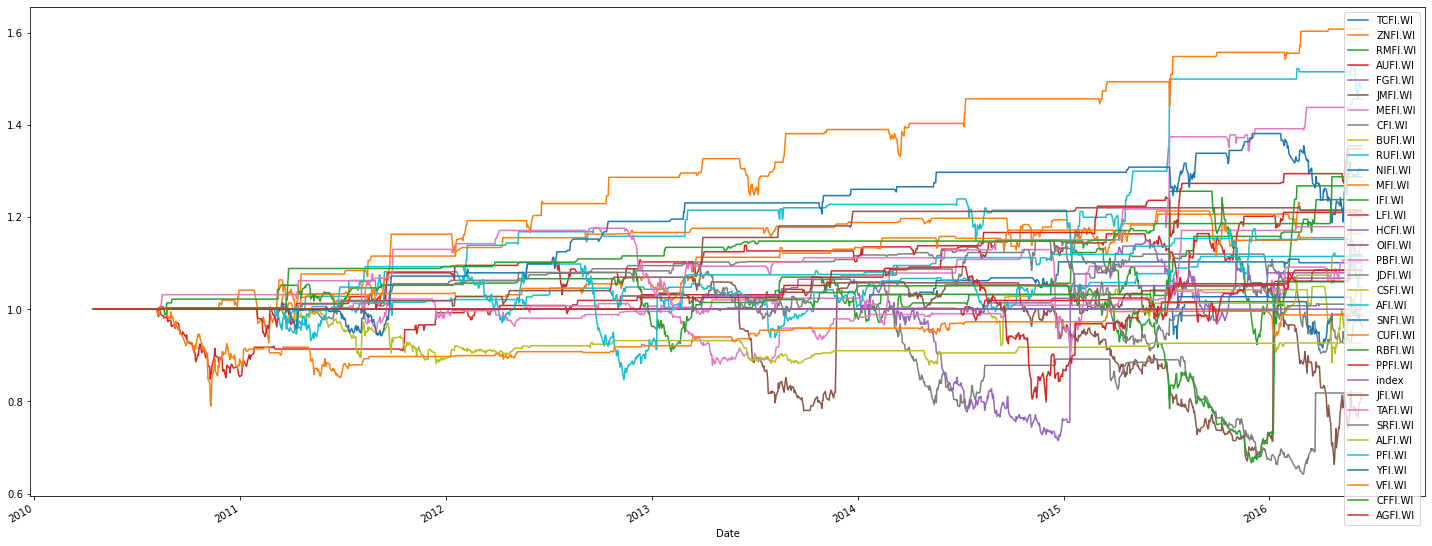

In [45]:
pd.DataFrame(result).set_index(data["Date"]).plot(figsize = (25,10))

In [72]:
pd.DataFrame(result)

,JFI.WI,RBFI.WI,AGFI.WI,CSFI.WI,MFI.WI,VFI.WI,ALFI.WI,SRFI.WI,CUFI.WI,CFFI.WI,...,FGFI.WI,NIFI.WI,PPFI.WI,AUFI.WI,LFI.WI,PBFI.WI,ZNFI.WI,RUFI.WI,MEFI.WI,OIFI.WI
0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.640592,0.772772,1.10407,0.987551,1.216128,1.063163,1.048188,1.050638,1.239666,1.11288,...,1.090829,1.051721,1.071241,1.133835,1.154811,1.114087,1.390449,1.459988,1.067724,1.063542
1491,0.640592,0.772772,1.10407,0.987551,1.216128,1.063163,1.048188,1.050638,1.239666,1.11288,...,1.090829,1.051721,1.071241,1.132507,1.154811,1.114087,1.390449,1.459988,1.067724,1.063542
1492,0.640592,0.772772,1.10407,0.987551,1.216128,1.063163,1.048188,1.050638,1.239666,1.11288,...,1.090829,1.051721,1.071241,1.136813,1.154811,1.114087,1.390449,1.459988,1.067724,1.063542
1493,0.640592,0.772772,1.10407,0.987551,1.216128,1.063163,1.048188,1.050638,1.239666,1.11288,...,1.090829,1.051721,1.071241,1.112148,1.154811,1.114087,1.390449,1.459988,1.067724,1.063542
